In [ ]:
import doctest
import io
import sys
import numpy as np

"""
This is a helper function that you can use to add simple unit tests
to your exercise.

This uses https://docs.python.org/3/library/doctest.html.
"""

def test(f):
    """Run unit tests defined in a function's docstring (doctests)"""
    tests = doctest.DocTestFinder().find(f)
    assert len(tests) <= 1
    for test in tests:
        # We redirect stdout to a string, so we can tell if the tests worked out or not
        orig_stdout = sys.stdout
        sys.stdout = io.StringIO()

        orig_rng_state = np.random.get_state()
        
        try:
            np.random.seed(1)
            results: doctest.TestResults = doctest.DocTestRunner().run(test)
            output = sys.stdout.getvalue()
        finally:
            sys.stdout = orig_stdout
            np.random.set_state(orig_rng_state)

        if results.failed > 0:
            print(f"❌ The are some issues with your implementation of `{f.__name__}`:")
            print(output, end="")
            print("**********************************************************************")
        elif results.attempted > 0:
            print(f"✅ Your `{f.__name__}` passes some basic tests.")
        else:
            print(f"Could not find any tests for {f.__name__}")


In [ ]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
#from test_utils import test
%load_ext autoreload
%autoreload 2

In [ ]:
# Defining a toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                        [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear regression

In [ ]:
class MyLinearRegression:
    """implementation of a linear regression model with 1d input with a similar signature as nn.Module
    """
    def __init__(self):
        # TODO: Define the parameters of the model (weights and biases) and initialize them
        self.w = torch.tensor([0.], requires_grad=True)
        self.b = torch.tensor([0.], requires_grad=True)
        #raise NotImplementedError
        
    def forward(self, x):
        """compute predictions based on the inputs.
        Inputs:
            x: torch.Tensor of floats, shape (n) where n is the size of batch
        
        Returns:
            tensor of floats, shape (n)
            
        >>> model = MyLinearRegression()  
        >>> def test():
        ...   model.w.data.fill_(2)
        ...   model.b.data.fill_(3)
        ...   return model(torch.tensor([0.0, 1.0, 2.0])).tolist()
        >>> test()
        [3.0, 5.0, 7.0]
        """ 
        #raise NotImplementedError
        return x*self.w+self.b
    
    def parameters(self):
        """returns a list of model's parameters 
        
        Returns:
            list of model parameters
            
        >>> model = MyLinearRegression()  
        >>> model.b in model.parameters() and model.w in model.parameters()
        True
        """
        # TODO: this function should return a list of parameters of the model
        #raise NotImplementedError
        return self.w, self.b
    
    def __call__(self, x):
        # Convenience function
        return self.forward(x)

In [ ]:
test(MyLinearRegression.forward)
test(MyLinearRegression.parameters)

✅ Your `forward` passes some basic tests.
✅ Your `parameters` passes some basic tests.


In [ ]:
def mselossfunc(pred, y):
    """the MSE loss function
    Inputs:
        pred: tensor of floats, shape (n)
        y: tensor of floats, shape (n)
    
    Returns:
        a single-element tensor, the average of MSEs
    
    >>> mselossfunc(torch.tensor([1., 3.]), torch.tensor([3., 2.])).tolist()
    2.5
    """
    #raise NotImplementedError
    return (pred - y).pow(2).mean()

In [ ]:
test(mselossfunc)

✅ Your `mselossfunc` passes some basic tests.


In [ ]:
def train(features, labels, model, lossfunc, optimizer, num_epoch):
    
    """train a model for num_epoch epochs on the given data
    
    Inputs:
        features: a numpy array
        labels: a numpy array
        model: an instance of nn.Module (or classes with similar signature)
        lossfunc: a function : (prediction outputs, correct outputs) -> loss
        optimizer: an instance of torch.optim.Optimizer
        num_epoch: an int
    """

    for epoch in range(num_epoch):
        # TODO: Step 1 - create torch variables corresponding to features and labels
        #raise NotImplementedError
        input = torch.from_numpy(features)
        output = torch.from_numpy(labels)

        # TODO: Step 2 - compute model predictions and loss
        #raise NotImplementedError
        pred = model.forward(input)
        loss = mselossfunc(pred, output)
        
        # TODO: Step 3 - do a backward pass and a gradient update step
        # Hint: Do not forget to first clear the gradients from the previous rounds
        #raise NotImplementedError
        optimizer.zero_grad()  
        loss.backward()
        optimizer.step()
        
        if epoch % 10 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epoch, loss.item()))
        
        
def visualize(x_train, y_train, model):
    # A convenience function for visualizing predictions given by the model

    predicted = model(torch.from_numpy(x_train)).data.numpy()
    order = np.argsort(x_train, axis=0)
    plt.plot(x_train[order].flatten(), y_train[order].flatten(), 'ro', label='Original data')
    plt.plot(x_train[order].flatten(), predicted[order].flatten(), label='Fitted line')
    plt.legend()
    plt.show()

Epoch [1/50], Loss: 5.9467
Epoch [11/50], Loss: 1.1699
Epoch [21/50], Loss: 0.3857
Epoch [31/50], Loss: 0.2567
Epoch [41/50], Loss: 0.2352


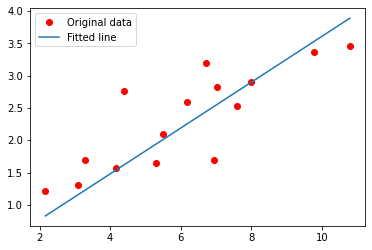

In [ ]:
# Training and visualizing predictions made by linear regression model
model = MyLinearRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=mselossfunc, 
      optimizer=optimizer,
      num_epoch=50)
visualize(x_train, y_train, model)

## Linear Regression (as nn.Module)

In [ ]:
class NNLinearRegression(nn.Module):
    """implementation of a linear regression model with 1d input as a nn.Module
    """
    def __init__(self):
        # TODO: call the super class init function. PyTorch needs this to initialize the model.
        super().__init__()
        # TODO: Define the parameters of the model (weights and biases) and initialize them
        self.w = nn.Parameter(torch.tensor([0.], requires_grad=True))
        self.b = nn.Parameter(torch.tensor([0.], requires_grad=True))
        #raise NotImplementedError
        
    def forward(self, x):
        """compute predictions based on the inputs.
        Inputs:
            x: torch.Tensor of floats, shape (n) where n is the size of batch
        
        Returns:
            tensor of floats, shape (n)
            
        >>> model = MyLinearRegression()  
        >>> def test():
        ...   model.w.data.fill_(2)
        ...   model.b.data.fill_(3)
        ...   return model(torch.tensor([0.0, 1.0, 2.0])).tolist()
        >>> test()
        [3.0, 5.0, 7.0]
        """ 
        #raise NotImplementedError
        return self.w * x + self.b

In [ ]:
test(NNLinearRegression.forward)

✅ Your `forward` passes some basic tests.


Epoch [1/50], Loss: 5.9467
Epoch [11/50], Loss: 1.1699
Epoch [21/50], Loss: 0.3857
Epoch [31/50], Loss: 0.2567
Epoch [41/50], Loss: 0.2352


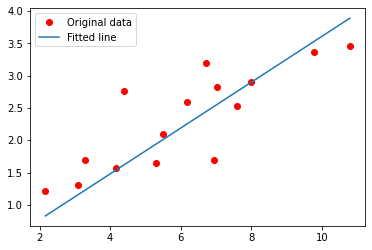

In [ ]:
# Training and visualizing predictions made by linear regression model
model = NNLinearRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=mselossfunc, 
      optimizer=optimizer,
      num_epoch=50)
visualize(x_train, y_train, model)

## Linear Regression (using nn package)

Epoch [1/100], Loss: 4.3306
Epoch [11/100], Loss: 0.9553
Epoch [21/100], Loss: 0.4008
Epoch [31/100], Loss: 0.3092
Epoch [41/100], Loss: 0.2937
Epoch [51/100], Loss: 0.2906
Epoch [61/100], Loss: 0.2896
Epoch [71/100], Loss: 0.2889
Epoch [81/100], Loss: 0.2883
Epoch [91/100], Loss: 0.2877


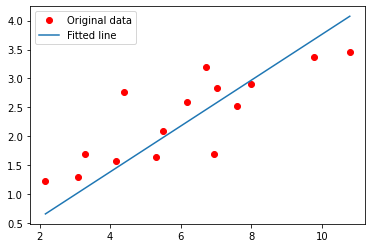

In [ ]:
# Training and visualizing predictions made by linear regression model (nn package)

# TODO: Using pre-existing modules from nn package, create a 1d linear regression model
model = nn.Linear(1,1)
#raise NotImplementedError


# TODO: use loss function from nn package
lossfunc = nn.MSELoss()
#raise NotImplementedError

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer,
      num_epoch=100)
visualize(x_train, y_train, model)

## MLP

Epoch [1/300], Loss: 5.2129
Epoch [11/300], Loss: 3.7106
Epoch [21/300], Loss: 2.4728
Epoch [31/300], Loss: 1.4455
Epoch [41/300], Loss: 0.7365
Epoch [51/300], Loss: 0.4584
Epoch [61/300], Loss: 0.4301
Epoch [71/300], Loss: 0.4284
Epoch [81/300], Loss: 0.4068
Epoch [91/300], Loss: 0.3824
Epoch [101/300], Loss: 0.3591
Epoch [111/300], Loss: 0.3380
Epoch [121/300], Loss: 0.3205
Epoch [131/300], Loss: 0.3060
Epoch [141/300], Loss: 0.2939
Epoch [151/300], Loss: 0.2833
Epoch [161/300], Loss: 0.2737
Epoch [171/300], Loss: 0.2648
Epoch [181/300], Loss: 0.2564
Epoch [191/300], Loss: 0.2485
Epoch [201/300], Loss: 0.2411
Epoch [211/300], Loss: 0.2342
Epoch [221/300], Loss: 0.2277
Epoch [231/300], Loss: 0.2217
Epoch [241/300], Loss: 0.2162
Epoch [251/300], Loss: 0.2111
Epoch [261/300], Loss: 0.2065
Epoch [271/300], Loss: 0.2022
Epoch [281/300], Loss: 0.1984
Epoch [291/300], Loss: 0.1950


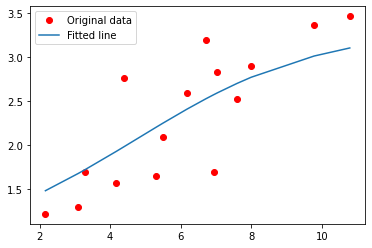

In [ ]:
class MLP(nn.Module):
    def __init__(self, hidden_size):
        super(MLP, self).__init__()
        # TODO: Define parameters / layers of a multi-layered perceptron with one hidden layer
        #raise NotImplementedError
        self.func1 = nn.Linear(1,hidden_size)
        self.func2 = nn.Linear(hidden_size,1)
        self.act = nn.Sigmoid()
    
    def forward(self, x):
        # TODO: implement forward computation
        #raise NotImplementedError
        return self.func2(self.act(self.func1(x)))
    
# TODO: Play with learning rate, hidden size, and optimizer type for multi-layered perceptron
hidden_size = 4
learning_rate = 0.01

model = MLP(hidden_size=hidden_size)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer,
      num_epoch=300)
visualize(x_train, y_train, model)

## Reproducibility
Since parameters are usually initialized randomly, 
running the same code twice will produce different outputs.
This makes it hard to debug the code or re-use it in the future by others.
To alleviate this problem, we can manually set the random seed at the beginning of the code. 

In [ ]:
"""
Set the numpy and torch random seed to a fixed number. 
"""
def set_seed(seed):
    """
    >>> set_seed(45)
    >>> x = torch.randn(1).item()
    >>> set_seed(45)
    >>> torch.randn(1).item() == x
    True
    """
    #raise NotImplementedError
    np.random.seed(1)
    torch.manual_seed(1)

In [ ]:
test(set_seed)

✅ Your `set_seed` passes some basic tests.
